## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [2]:
import pandas as pd

# URL do arquivo CSV
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

# Carregando o arquivo CSV em um DataFrame
df = pd.read_csv(url)

# Visualizando as primeiras linhas do DataFrame
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregue o conjunto de dados diretamente do link
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Defina as features (variáveis independentes) e a coluna alvo (variável dependente)
X = data.drop('medv', axis=1)  # Exclua a coluna 'medv' do conjunto de features
y = data['medv']  # Use a coluna 'medv' como a variável alvo

# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine o modelo da árvore de regressão
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = regressor.predict(X_test)

# Avalie o modelo usando a métrica de erro médio quadrado (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Médio Quadrado (MSE): {mse}")



Erro Médio Quadrado (MSE): 22.478823529411766


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Vamos primeiro carregar os dados
data = pd.DataFrame({
    'crim': [0.00632, 0.02731, 0.02729, 0.03237, 0.06905],
    'zn': [18.0, 0.0, 0.0, 0.0, 0.0],
    'indus': [2.31, 7.07, 7.07, 2.18, 2.18],
    'chas': [0, 0, 0, 0, 0],
    'nox': [0.538, 0.469, 0.469, 0.458, 0.458],
    'rm': [6.575, 6.421, 7.185, 6.998, 7.147],
    'age': [65.2, 78.9, 61.1, 45.8, 54.2],
    'dis': [4.0900, 4.9671, 4.9671, 6.0622, 6.0622],
    'rad': [1, 2, 2, 3, 3],
    'tax': [296, 242, 242, 222, 222],
    'ptratio': [15.3, 17.8, 17.8, 18.7, 18.7],
    'b': [396.90, 396.90, 392.83, 394.63, 396.90],
    'lstat': [4.98, 9.14, 4.03, 2.94, 5.33],
    'medv': [24.0, 21.6, 34.7, 33.4, 36.2]
})

# Separe os recursos (features) e o alvo (target)
X = data.drop(columns=['medv'])
y = data['medv']

# Crie e treine o modelo de árvore de regressão
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)


DecisionTreeRegressor(random_state=42)

In [13]:
# Exemplo de dados para o qual desejamos calcular o caminho
sample_data = X.iloc[0:1]

# Obtenha o caminho para o exemplo de dados na árvore
path = regressor.decision_path(sample_data)

# 'path' conterá uma matriz esparsa indicando o caminho
# Você pode inspecionar as posições não nulas na matriz para ver os nós visitados

# Por exemplo, para obter os nós visitados no caminho:
visited_nodes = path.indices


In [14]:
from sklearn.tree import export_text

# Para calcular o caminho para o primeiro exemplo de dados
sample_data = X.iloc[0:1]
path = regressor.decision_path(sample_data)

# Converta o caminho em um formato legível
path_as_text = export_text(regressor, feature_names=X.columns.tolist(), max_depth=regressor.get_depth())
print(path_as_text)


|--- rm <= 6.79
|   |--- lstat <= 7.06
|   |   |--- value: [24.00]
|   |--- lstat >  7.06
|   |   |--- value: [21.60]
|--- rm >  6.79
|   |--- b <= 395.76
|   |   |--- indus <= 4.63
|   |   |   |--- value: [33.40]
|   |   |--- indus >  4.63
|   |   |   |--- value: [34.70]
|   |--- b >  395.76
|   |   |--- value: [36.20]



### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [18]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Supondo que você já tenha obtido os valores de alpha em um array chamado 'alphas'
alphas = [0.01, 0.1, 0.5, 1.0]  # Substitua pelos seus valores

# Inicialize uma lista para armazenar as árvores
trees = []

for alpha in alphas:
    # Crie uma árvore com o valor de alpha específico
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    
    # Treine a árvore
    tree.fit(X_train, y_train)  # Certifique-se de que você já dividiu seus dados em treinamento e teste
    
    # Adicione a árvore à lista
    trees.append(tree)
      

In [19]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import export_text
from sklearn import tree

# Suponha que você já tenha obtido os valores de alpha em um array chamado 'alphas'
alphas = [0.01, 0.1, 0.5, 1.0]  # Substitua pelos seus valores

# Inicialize uma lista para armazenar as árvores
trees = []

for alpha in alphas:
    # Crie uma árvore com o valor de alpha específico
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    
    # Treine a árvore
    tree.fit(X_train, y_train)  # Certifique-se de que você já dividiu seus dados em treinamento e teste
    
    # Adicione a árvore à lista
    trees.append(tree)

# Agora, vamos visualizar as árvores
for i, tree in enumerate(trees):
    alpha = alphas[i]  # O valor de alpha correspondente a esta árvore
    print(f"Árvore {i + 1} (Alfa = {alpha}):")
    
    # Use export_text para imprimir a estrutura da árvore
    tree_rules = export_text(tree, feature_names=X_train.columns.tolist())
    print(tree_rules)
    print("\n")


Árvore 1 (Alfa = 0.01):
|--- rm <= 6.94
|   |--- lstat <= 14.40
|   |   |--- dis <= 1.38
|   |   |   |--- b <= 339.99
|   |   |   |   |--- value: [27.90]
|   |   |   |--- b >  339.99
|   |   |   |   |--- value: [50.00]
|   |   |--- dis >  1.38
|   |   |   |--- rm <= 6.54
|   |   |   |   |--- rm <= 6.10
|   |   |   |   |   |--- rad <= 1.50
|   |   |   |   |   |   |--- tax <= 288.50
|   |   |   |   |   |   |   |--- value: [11.90]
|   |   |   |   |   |   |--- tax >  288.50
|   |   |   |   |   |   |   |--- value: [18.25]
|   |   |   |   |   |--- rad >  1.50
|   |   |   |   |   |   |--- ptratio <= 17.85
|   |   |   |   |   |   |   |--- rm <= 5.21
|   |   |   |   |   |   |   |   |--- value: [15.30]
|   |   |   |   |   |   |   |--- rm >  5.21
|   |   |   |   |   |   |   |   |--- tax <= 416.50
|   |   |   |   |   |   |   |   |   |--- ptratio <= 17.10
|   |   |   |   |   |   |   |   |   |   |--- lstat <= 9.94
|   |   |   |   |   |   |   |   |   |   |   |--- value: [23.43]
|   |   |   |   |   | 

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [20]:
from sklearn.metrics import mean_squared_error

# Inicialize uma lista para armazenar os valores de MSE
mse_values = []

for tree in trees:
    # Faça previsões com a árvore
    y_pred = tree.predict(X_test)
    
    # Calcule o MSE e adicione à lista de valores
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Você pode imprimir ou analisar esses valores como necessário
for i, alpha in enumerate(alphas):
    print(f"MSE da árvore com alfa {alpha}: {mse_values[i]}")


MSE da árvore com alfa 0.01: 11.608446835539771
MSE da árvore com alfa 0.1: 8.175717643385331
MSE da árvore com alfa 0.5: 19.17808925010238
MSE da árvore com alfa 1.0: 10.727540557531764


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

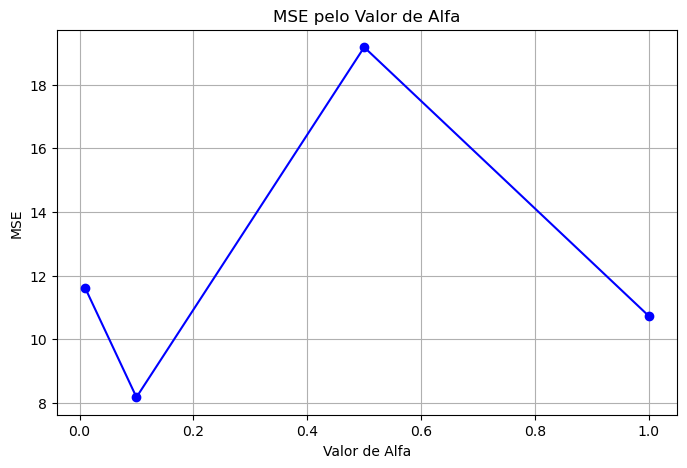

In [22]:
import matplotlib.pyplot as plt

# Valores de alfa
alfa = [0.01, 0.1, 0.5, 1.0]

# Valores de MSE correspondentes
mse = [11.608446835539771, 8.175717643385331, 19.17808925010238, 10.727540557531764]

# Crie o gráfico
plt.figure(figsize=(8, 5))
plt.plot(alfa, mse, marker='o', linestyle='-', color='b')
plt.title('MSE pelo Valor de Alfa')
plt.xlabel('Valor de Alfa')
plt.ylabel('MSE')
plt.grid(True)

# Exiba o gráfico
plt.show()




### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [45]:
# Para cada árvore na lista
for tree in trees:
    # Imprima o R²
    print(f"R² para a árvore com alpha = {tree.ccp_alpha}: {tree.score(X_test, y_test)}")


R² para a árvore com alpha = 0.01: 0.8417039686857382
R² para a árvore com alpha = 0.1: 0.8885136250844784
R² para a árvore com alpha = 0.5: 0.7384822052862721
R² para a árvore com alpha = 1.0: 0.853716253338804


In [23]:
import numpy as np

def r_squared(y_true, y_pred):
  """
  Calcula o R-quadrado de uma árvore de decisão.

  Args:
    y_true: Os valores observados.
    y_pred: As previsões do modelo.

  Returns:
    O R-quadrado do modelo.
  """

  y_mean = np.mean(y_true)
  ss_tot = np.sum((y_true - y_mean)**2)
  ss_res = np.sum((y_true - y_pred)**2)
  r_squared = 1 - (ss_res / ss_tot)
  return r_squared

# Exemplo de uso

y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([2, 3, 4, 5, 6])

r_squared_value = r_squared(y_true, y_pred)
print(r_squared_value)


0.5


### 7. Visualize esta árvore.

|--- rm <= 6.94
|   |--- lstat <= 14.40
|   |   |--- dis <= 1.38
|   |   |   |--- lstat <= 10.51
|   |   |   |   |--- value: [50.00]
|   |   |   |--- lstat >  10.51
|   |   |   |   |--- value: [27.90]
|   |   |--- dis >  1.38
|   |   |   |--- rm <= 6.54
|   |   |   |   |--- rm <= 6.10
|   |   |   |   |   |--- value: [20.36]
|   |   |   |   |--- rm >  6.10
|   |   |   |   |   |--- value: [22.73]
|   |   |   |--- rm >  6.54
|   |   |   |   |--- lstat <= 5.78
|   |   |   |   |   |--- value: [30.05]
|   |   |   |   |--- lstat >  5.78
|   |   |   |   |   |--- value: [25.99]
|   |--- lstat >  14.40
|   |   |--- crim <= 6.93
|   |   |   |--- age <= 73.30
|   |   |   |   |--- b <= 395.10
|   |   |   |   |   |--- value: [22.30]
|   |   |   |   |--- b >  395.10
|   |   |   |   |   |--- value: [19.60]
|   |   |   |--- age >  73.30
|   |   |   |   |--- crim <= 0.17
|   |   |   |   |   |--- value: [19.73]
|   |   |   |   |--- crim >  0.17
|   |   |   |   |   |--- value: [15.91]
|   |   |--- crim > 

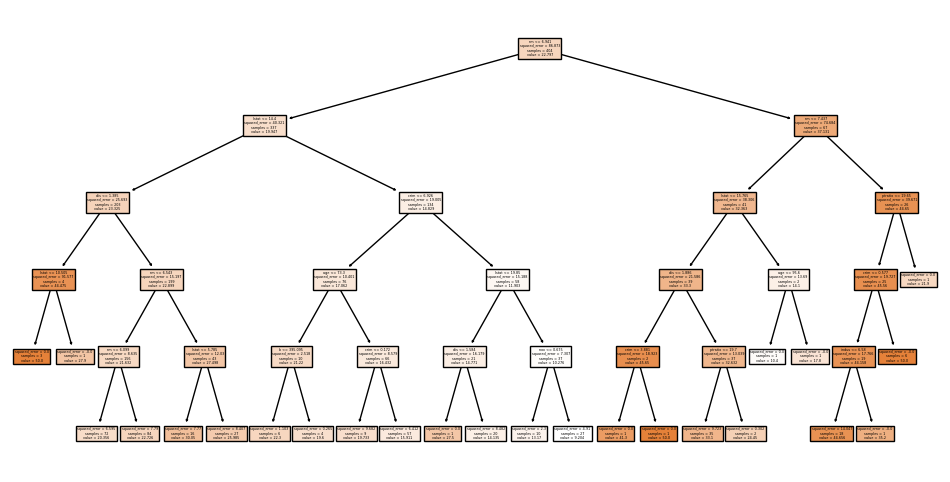

In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Carregue o conjunto de dados diretamente do link
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Defina as features (variáveis independentes) e a coluna alvo (variável dependente)
X = data.drop('medv', axis=1)  # Exclua a coluna 'medv' do conjunto de features
y = data['medv']  # Use a coluna 'medv' como a variável alvo

# Divida o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie uma árvore de decisão com profundidade máxima 5 (ou a profundidade desejada)
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

# Visualizar a árvore de decisão em texto
tree_rules = export_text(regressor, feature_names=X_train.columns.tolist())
print(tree_rules)

# Visualize a árvore em uma figura
plt.figure(figsize=(12, 6))
plot_tree(regressor, filled=True, feature_names=X_train.columns.tolist())
plt.show()

